
<nav class="navbar navbar-default">
  <div class="container-fluid">
    <div class="navbar-header" style="float: left">
        <a class="navbar-brand" href="0_Forside.ipynb" target="_self"> <h2> &uarr; Tilbake til forsiden</h2></a>
    </div>
  </div>
</nav>

# Logaritmiske plot og flere grafer

**Læringsmål:**
* Forståelse for logaritmiske funksjoner og akser
* Kunne bruke subplot for å sidestille grafer

**Oversikt:**
* [Oppgave a) logaritmisk y-akse](#oppg_9a)
* [Oppgave b) logaritmsik x-akse](#oppg_9b)
* [Oppgave c) logaritmisk x- og y-akse](#oppg_9c)
* [Oppgave d) bruk av subplot](#oppg_9d)

## Intro til logaritmiske plot

Noen ganger ønsker man å plotte funksjoner av `logaritmisk` natur. Ta for eksempel funksjonen $f(x) = e^x$ som ilustrert nedenfor. Vi kan se at grafen til venstre ser tilnærmet ut helt flat frem til $x = 2.5$, mens på grafen til høyre kan vi se at y-verdien endrer seg gjennom hele grafen. 

*PS: Kodecellen under tar i bruk enkelte funksjoner vi ikke har utforsket før, så det er OK dersom noe av det ikke gir mening enda. Ta det med ro, vi skal ta oss tid til å bli bedre kjent med disse nye funksjonene i løpet av denne oppgaven.*

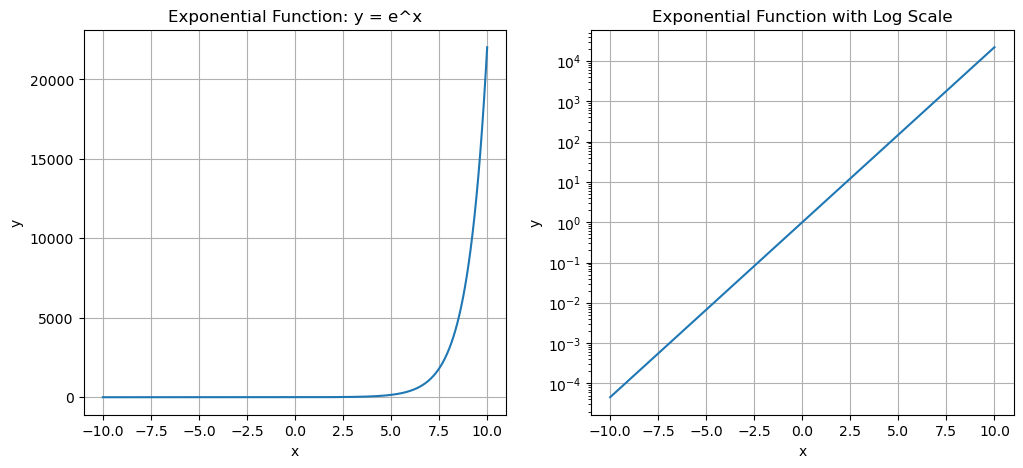

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.exp(x)

x = np.linspace(-10, 10, 1001)


plt.figure(figsize=(12, 5))  # Lag en ny "blank" figur med bredde 12 og høyde 6
plt.subplot(1, 2, 1)         # "Aktiver" en graf i venstre halvdel av figuren for å "tegne" i

# Plot f(x) med lineær skala
plt.plot(x, f(x))
plt.title('Exponential Function: y = e^x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True) # Lag et rutenett i grafen

plt.subplot(1, 2, 2)          # "Aktiver" en graf i høyre halvdel av figuren for å "tegne" i
# Plot f(x) med logaritmisk skala
plt.plot(x, f(x))
plt.title('Exponential Function with Log Scale')
plt.xlabel('x')
plt.ylabel('y')
plt.yscale('log')  # Sett y-aksen som logaritmisk heller enn lineær
plt.grid(True) # Lag et rutenett i grafen

Dette betyr at for dette tilfellet kan vi få mer informasjon av en graf med logaritmisk y-akse, enn en graf med lineær y-akse.

Bli gjerne kjent med å lese av den logaritmiske grafen. Du kan se de store y-verdiene på aksen som $10 ^ 0$ og $10^1$, men de mindre strekene mellom er ikke markert. For intervallet mellom $10^0$ og $10^1$ betyr de $2 \cdot 10^0$, $3 \cdot 10^0$, ..., $9 \cdot 10 ^0$

I koden som lager figuren ovenfor er det tatt i bruk et par funksjoner som vi ikke har sett før:

### [`plt.subplot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)

Når vi kaller funksjonen `plt.subplot(rows, cols, index)` vil den dele opp figuren i et rutenett, og "aktiverer" de(n) ruten(e) angitt i `pos`. Ved å f.eks. skrive `plt.subplot(2,3,5)`, vil "hovedfiguren" deles opp på følgende vis:
| $$1$$ | $$2$$| $$3$$ |
| --- | --- | --- |
| $$4$$ | $$[5]$$ | $$6$$ |

Bruk av funksjoner som f.eks. `plt.plot()` som kommer etter `plt.subplots(2,3,5)` vil da tegne en liten graf i den kolonnen ruten på nedre rad, altså i indeks 5.

### [`plt.yscale('log')`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yscale.html)

Setter skaleringen av y-aksen til å følge en logaritmisk økning heller enn lineær økning. Det vil si at hver "linje" oppover i rutenettet tilsvarer en verdi som er 10 ganger større enn forrige "linje". Funksjonen kan også brukes til å sette andre skaleringsregler.

Det finnes også en funksjon [`xscale()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xscale.html) som fungerer på samme måte, men endrer på skaleringen av $x$-aksen istedenfor.


## Eksempel på bruk

Logaritmiske plot blir brukt støtt og stadig til mye innenfor dataanalyse, fysikk, statistikk, signalbehandling, etc. Vi skal ta for oss et litt kjent eksempel med tyngdekraften mellom to legemer. Fra øving 1, oppg 7b brukte vi formelen til tyngdekraft mellom to legemer til å finne kraften solen og månen virker med på et menneske på jorden

<img src="Figurer/gravityFormula.png" width="30%" align="center" />

der $G$ er tyngdekraftkonstanten $G = 6.67\cdot 10^{-11}$. Dersom massen er konstant, og vi ønsker å analysere grafisk hvordan tyngdekraften utvikler seg som funksjon av avstand, vil en graf med lineær y-akse gi umiddelbare problemer grunnet $r^2$-leddet i nevneren. Figuren nedenfor viser hvordan en slik graf vil se ut:

<img src="Figurer/GravityLinScale.png" width="50%" align="center" />


<!-- NB! Se gjerne på kodecellen under, men du trenger ikke skjønne all koden, bare kjøre den. -->

<a id="oppg_9a"></a>
## a) 
Gitt to objekt med masse $m_1 = 1\text{ kg}$ og $m_2 = 1\text{ kg}$ som befinner seg $r$ meter unna hverandre. Lag en figur som plotter tyngdekraften mellom de objektene som funksjon av avstand $r$ i intervallet $1\text{ m} \leq r \leq 10^6 \text{ m}$.  Figuren skal ha logaritisk $y$-akse og lineær $x$-akse.

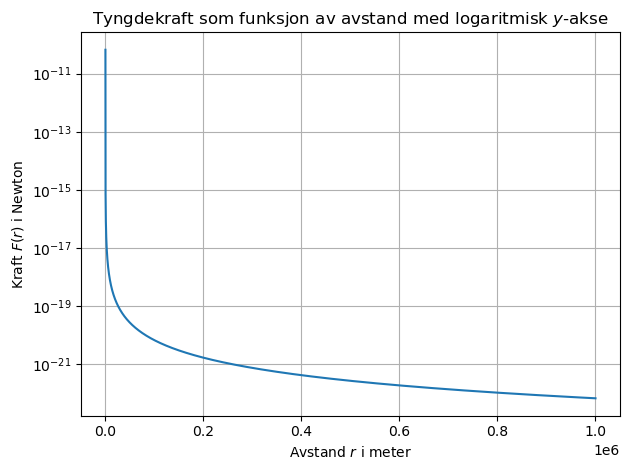

In [2]:
### BEGIN SOLUTION
%matplotlib inline
x_vals = np.linspace(1, 1000000, 10000)

def calculateForce(r):
    M = 1
    m = 1
    G = 6.67e-11
    return G * (m * M) / (r * r)

y_vals = calculateForce(x_vals)


# Plot the exponential function with log scale
plt.plot(x_vals, y_vals)
plt.title(r'Tyngdekraft som funksjon av avstand med logaritmisk $y$-akse')
plt.xlabel('Avstand $r$ i meter')
plt.ylabel('Kraft $F(r)$ i Newton')
plt.yscale('log')
#plt.yscale('log')
#axs[1].set_xscale("log")
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.savefig("Figurer/oppg9a_LF.png")
fig = plt.gcf() # La denne stå helt til slutt
### END SOLUTION


In [3]:
### BEGIN HIDDEN TESTS
from autofeedback import CustomTests

grading_results = CustomTests()

try:
    yscale = fig.axes[-1].get_yscale()
    xscale = fig.axes[-1].get_xscale()
    x_vals = fig.axes[-1].lines[-1].get_xdata()
except Exception as e:
    grading_results.add_result("Failed to acquire axis information for plot: "+ e.args[0])
else:
    grading_results.test(x_vals[0] == 1.0 and x_vals[-1] == 1e6, 
                        "Function plotted for correct range of distances '1.0 <= r <= 10^6",
                        f"The range of plotted along the x-axis covers the range '{x_vals[0]} <= r <= {x_vals[-1]}' and not '0 <= r <= 10^6")

    grading_results.test(yscale == 'log',
                         "Y-axis scale is logarithmic",
                         f"Y-axis has scale '{yscale}' and not 'log'.")
    grading_results.test(xscale == 'linear',
                         "X-axis scale is linear",
                         f"X-axis has scale '{xscale}' and not 'linear'.")
round(grading_results.get_results()*3, 2)
### END HIDDEN TESTS

3.0

Dersom du har løst deloppgave **a)** riktig så skal du sitte igjen med et plot som ser ca. [slik](Figurer/oppg9a_LF.png) ut, og viser tydeligere hvordan funksjonen $F(r)$ utvikler seg avhengig av  avstand $r$. Men, det vil fortsatt være vanskelig å bruke grafen fra deloppgave **a)** til å tyde f.eks. $F(100)$. I situasjoner som denne kan det ofte være ønskelig å ha en graf der det er like lett å differensiere mellom $10$ og $100$ meter som det er å differensiere mellom $100$ og $1000$ kilometer. Da trenger vi en logaritmisk $x$-akse.

Men, logaritmisk $x$-akse krever litt mere forarbeid enn logaritmisk $y$-akse. Det er viktig å passe på at arrayen med verider langs x-aksen ***også*** er logaritmisk fordelt. Hvis ikke kan vi ende opp med en graf som er veldig "hakkete" i den éne enden. Dette gjør vi med numpy-funksjonen [`np.logspace(start, stop, num)`](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html). Denne fungerer *nesten* på samme måte som `linspace(start, stop, num)`, men parametrene `start`og `stop` er *eksponenter*. Med andre ord så er `np.logspace(start, stop, num)` det samme som `10**np.linspace(start, stop, num)`.
```Python
x = np.logspace(0, 4, 5)      # Gir en array [1, 10, 100, 1000, 10000]
x = 10**np.linspace(0, 4, 5)  # Gir også en array [1, 10, 100, 1000, 10000]
```
<!--Hadde jeg nå spurt om tyngdekraften var størst ved stor eller liten avstand mellom objektene håper jeg at du sier deg enig i at grafen til høyre er mer hjelpsom. Med den grafen kan vi mye lettere se hvordan kraften endrer seg selv når den dekker et veldig stor område.-->

<a id="oppg_9b"></a>
## b) 
Lag et nytt plot av funksjonen $F(r)$ i intervallet $1\text{ m} \leq r \leq 10^6 \text{ m}$ der $x$-aksen er logaritmisk (men $y$-aksen er lineær)

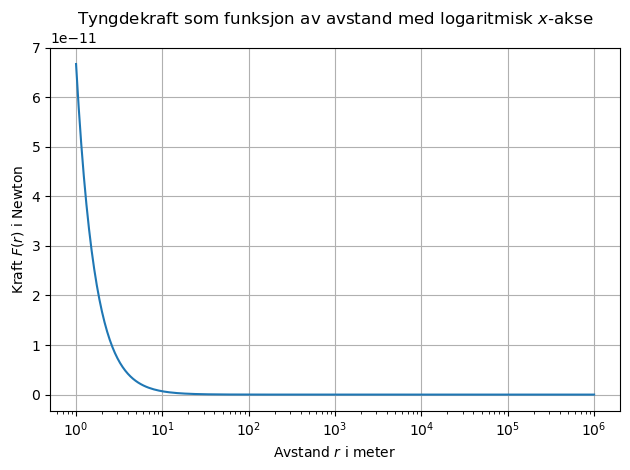

In [4]:
### BEGIN SOLUTION
%matplotlib inline
x_vals = np.logspace(0, 6, 201)
#x_vals = np.linspace(1, 1_000_000, 201)

def calculateForce(r):
    M = 1
    m = 1
    G = 6.67e-11
    return G * (m * M) / (r * r)

y_vals = calculateForce(x_vals)


# Plot the exponential function with log scale
plt.plot(x_vals, y_vals)
plt.title(r'Tyngdekraft som funksjon av avstand med logaritmisk $x$-akse')
plt.xlabel('Avstand $r$ i meter')
plt.ylabel('Kraft $F(r)$ i Newton')

plt.xscale('log')
#plt.yscale('log')
#axs[1].set_xscale("log")
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.savefig("Figurer/oppg9b_LF.png")
fig = plt.gcf()
### END SOLUTION


In [5]:
### BEGIN HIDDEN TESTS
from autofeedback import CustomTests

grading_results = CustomTests()

try:
    yscale = fig.axes[-1].get_yscale()
    xscale = fig.axes[-1].get_xscale()
    x_vals = fig.axes[-1].lines[-1].get_xdata()
except Exception as e:
    grading_results.add_result("Failed to acquire axis information for plot: "+ e.args[0])
else:
    grading_results.test(yscale == 'linear',
                         "Y-axis scale is linear",
                         f"Y-axis has scale '{yscale}' and not 'linear'.")
    grading_results.test(xscale == 'log',
                         "X-axis scale is log",
                         f"X-axis has scale '{xscale}' and not 'log'.")
    grading_results.test(x_vals[len(x_vals)//2] <= x_vals[-1]/10, 
                         "Data points are logarithmically spaced along X-axis",
                         "Data points do not appear to be logarithmically spaced along X-axis")
round(grading_results.get_results()*3, 2)
### END HIDDEN TESTS

3.0

Har du løst deloppgve **b)** riktig skal du sitte igjen med et plot som ser ca. [slik](Figurer/oppg9b_LF.png) ut. Her har vi litt mulighet til å hente ut informasjon om tyngdekraften i starten, men så ser det ut som tyngdekraften er konstant lik $0$ fra ca. $40 \text{ m}$ og utover. Den beste måten å visualisere funksjonen $F(r)$ på er nok med *både* logaritmisk $x$-akse *og* logaritmisk $y$-akse.

<a id="oppg_9c"></a>
## c) 

Lag en figur som plotter tyngdekraften $F$ mellom de objektene som funksjon av avstand $r$ i intervallet $1\text{ m} \leq r \leq 10^6 \text{ m}$.  Figuren skal ha logaritisk $y$-akse *og* logaritmisk $x$-akse. Figuren bør se ca. [slik](Figurer/oppg9c_LF.png) ut.

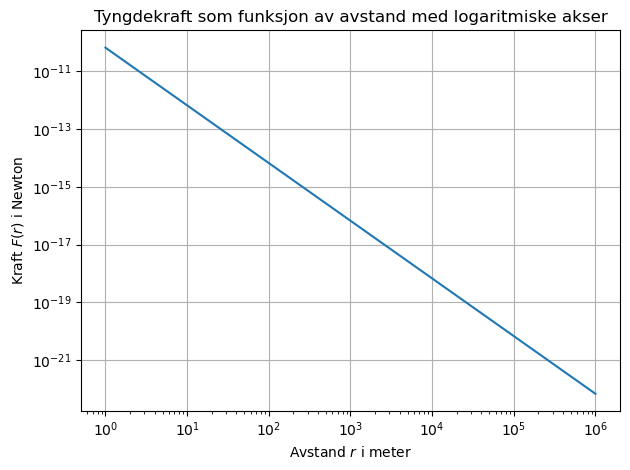

In [6]:
### BEGIN SOLUTION
%matplotlib inline
x_vals = np.logspace(0, 6, 201)

def calculateForce(r):
    M = 1
    m = 1
    G = 6.67e-11
    return G * (m * M) / (r * r)

y_vals = calculateForce(x_vals)


# Plot the exponential function with log scale
plt.plot(x_vals, y_vals)
plt.title(r'Tyngdekraft som funksjon av avstand med logaritmiske akser')
plt.xlabel('Avstand $r$ i meter')
plt.ylabel('Kraft $F(r)$ i Newton')
plt.xscale('log')
plt.yscale('log')

plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.savefig("Figurer/oppg9c_LF.png")
fig = plt.gcf()
### END SOLUTION

In [7]:
### BEGIN HIDDEN TESTS
from autofeedback import CustomTests

grading_results = CustomTests()

try:
    yscale = fig.axes[-1].get_yscale()
    xscale = fig.axes[-1].get_xscale()
    x_vals = fig.axes[-1].lines[-1].get_xdata()
except Exception as e:
    grading_results.add_result("Failed to acquire axis information for plot: "+ e.args[0])
else:
    grading_results.test(yscale == 'log',
                         "Y-axis scale is logarithmic",
                         f"Y-axis has scale '{yscale}' and not 'log'.")
    grading_results.test(xscale == 'log',
                         "X-axis scale is logarithmic",
                         f"X-axis has scale '{xscale}' and not 'log'.")
    grading_results.test(x_vals[len(x_vals)//2] <= x_vals[-1]/10, 
                         "Data points are logarithmically spaced along X-axis",
                         "Data points do not appear to be logarithmically spaced along X-axis")
round(grading_results.get_results()*2, 2)
### END HIDDEN TESTS

2.0

<a id="oppg_9d"></a>
## d)

Lag til slutt en ny figur som inneholder alle plottene fra deloppgave **a)**, **b)** og **c)**, såvel som en figur der både x- og y -aksen er lineær. [Her](Figurer/oppg9d_LF.png) er et forslag til hvordan figuren kan se ut.<br>

*PS: Ikke bekymre deg alt for mye dersom du ikke får figuren til å se helt lik ut. Dersom du ser at noe av teksten for ett plot overlapper teksten for et annet plot, kan dette fikses ved å kalle funksjonen [`plt.tight_Layout()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html#) helt til slutt.* 

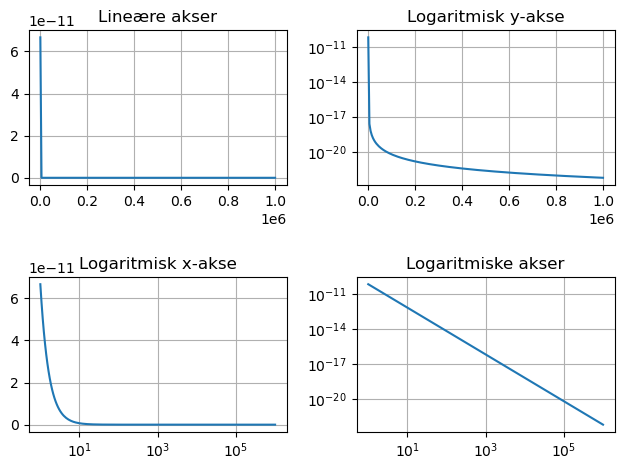

In [8]:
### BEGIN SOLUTION
import numpy as np
import matplotlib.pyplot as plt

def F(r):
    M = 1
    m = 1
    G = 6.67e-11
    return G * (m * M) / (r * r)

r_lin = np.linspace(1, 1e6, 201)
r_log = np.logspace(0, 6, 201)

plt.subplot(2,2,1)
plt.plot(r_lin, F(r_lin))
plt.grid(True)
plt.title("Lineære akser")

plt.subplot(2,2,2)
plt.plot(r_lin, F(r_lin))
plt.yscale('log')
plt.grid(True)
plt.title("Logaritmisk y-akse")

plt.subplot(2,2,3)
plt.plot(r_log, F(r_log))
plt.xscale('log')
plt.grid(True)
plt.title("Logaritmisk x-akse")

plt.subplot(2,2,4)
plt.plot(r_log, F(r_log))
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.title("Logaritmiske akser")

plt.tight_layout()
plt.savefig("Figurer/oppg9d_LF.png")
fig = plt.gcf()
### END SOLUTION


In [9]:
### BEGIN HIDDEN TESTS
from autofeedback import CustomTests

grading_results = CustomTests()

try:
    axes = fig.axes
except Exception as e:
    grading_results.add_result("Failed to acquire axis information for plot: "+ e.args[0])
else:
    grading_results.test(len(axes)==4, 
                         "Figure has 4 subplots",
                         f"Figure has {len(axes)} subplots and not 4")
round(grading_results.get_results()*2, 2)
### END HIDDEN TESTS

2.0

<br>
<nav class="navbar navbar-default">
    <div class="container-fluid">
        <div class="navbar-header" style="float: left">
            <a class="navbar-brand" href="8_Dataanalyse.ipynb" target="_self">&lt; Forrige side: <i>dataanalyse med python</i></a>
            </div>
        <div class="navbar-header" style="float: right">
            <a class="navbar-brand" href="10_spill_en_melodi.ipynb" target="_self">Neste side: <i>spill en melodi</i> &gt;</a>
        </div>
    </div>
</nav>